In [256]:
import numpy as np
from scipy import sparse
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

In [257]:
def readfile(filename, delim):
    f = open(filename, encoding="ISO-8859-1")
    result = []
    for line in f.readlines():
        line = line[:line.find('\n')]
        result.append(line.split(delim))
    result = np.array(result)
    return result

In [31]:
#userlist = readfile("../../ml-100k/u.item", "|")
#itemlist = readfile("../../ml-100k/u.item", "|")
ratings = readfile("../../ml-100k/ua.base", "\t")
test = readfile("../../ml-100k/ua.test", "\t")

In [55]:
def makesimilar(ratings):
    users = np.array(ratings[:,0], dtype=int)-1
    movies = np.array(ratings[:,1], dtype=int)-1
    score = np.array(ratings[:,2], dtype=int)
    data = sparse.coo_matrix((score,(users,movies)),shape=(len(userlist), len(itemlist)))
    usersim = cosine_similarity(data)
    return usersim, data.tocsr()

In [56]:
usersim, mratings = makesimilar(ratings)

In [239]:
def predict_ratings(test, k):
    y_predicted=[]
    c=0
    #print(test)
    for item in test:
        c+=1
        user = int(item[0])-1
        movie = int(item[1])-1
        score = int(item[2])
        moviescores = mratings.getcol(movie)
        similaru = usersim[user]
        relevantu = moviescores.nonzero()[0]
        similaru = similaru[relevantu]
        nearestusers = similaru.argsort()[::-1][:k]
        relevantu = relevantu[nearestusers]
        y = moviescores[relevantu, :].toarray().ravel()
        x = similaru[nearestusers]
        try:
            y_predicted.append(sum(y * x) / sum(x))
        except ZeroDivisionError:
            y_predicted.append(0)
    y_actual = np.array(test[:,2], dtype=int)
    return sqrt(mean_squared_error(y_actual, y_predicted))

In [252]:
rmse = []
for k in range(101):
    if k%10==0:
        print(k)
    rmse.append(predict_ratings(test,k))

0
10
20
30
40
50
60
70
80
90
100


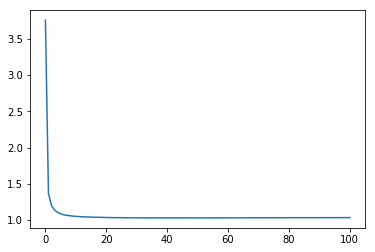

In [255]:
plt.plot(rmse)
plt.show()

In [1]:
plt.plot(np.arrange(40,101), rmse[40:])
plt.show()

NameError: name 'plt' is not defined